# Q1: How to connect Python with SQL Database?

Python comes with SQLite3, which provides a lightweight disk-based database that doesn't require a seperate server process. It's useful to prototype with SQLite and then port the code to a larger database system, like MySQL.

In [5]:
import sqlite3
import pandas as pd

In [9]:
con = sqlite3.connect('/Users/suruisun/Downloads/sakila.db') # sakila.db is a demonstrated database with 16 tables

In [10]:
sql_query = """SELECT * FROM customer"""

df = pd.read_sql(sql_query,con)

df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28


In [11]:
def sql_to_df(sql_query):
    df = pd.read_sql(sql_query,con)
    return df

In [12]:
query = """ SELECT first_name, last_name FROM customer"""
sql_to_df(query).head()

,first_name,last_name
0,MARY,SMITH
1,PATRICIA,JOHNSON
2,LINDA,WILLIAMS
3,BARBARA,JONES
4,ELIZABETH,BROWN


In [13]:
query =  """SELECT * FROM customer ORDER BY last_name DESC;""" 
sql_to_df(query).head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,28,1,CYNTHIA,YOUNG,CYNTHIA.YOUNG@sakilacustomer.org,32,1,2006-02-14 22:04:36.000,2011-09-14 18:10:29
1,413,2,MARVIN,YEE,MARVIN.YEE@sakilacustomer.org,418,1,2006-02-14 22:04:37.000,2011-09-14 18:10:40
2,402,1,LUIS,YANEZ,LUIS.YANEZ@sakilacustomer.org,407,1,2006-02-14 22:04:37.000,2011-09-14 18:10:39
3,318,1,BRIAN,WYMAN,BRIAN.WYMAN@sakilacustomer.org,323,1,2006-02-14 22:04:37.000,2011-09-14 18:10:37
4,31,2,BRENDA,WRIGHT,BRENDA.WRIGHT@sakilacustomer.org,35,1,2006-02-14 22:04:36.000,2011-09-14 18:10:29


We can use the above function with given SQL query to extract information from database to a Pandas DataFrame in Python.

# Q2: SQL query and joins 

In [ ]:
#SQL SELECT attributes from different tables:
# suppose we have three tables, each has three attributes and three tuples: 
# tb1: K1, D11, D12
# tb2: K2, D21, D22
# tb3: K3, D31, D32
"""SELECT K1,D11,K2,D21 FROM tb1, tb2"""
# if there is no WHERE clause, this query will implement the cross product,and return with 9 tuples

In [19]:
#SQL LEFT JOIN Example:
#tb1 LEFT JOIN tb2
tb1 = pd.DataFrame([['A','A','C'],['B','B','D'],['C','C','G']],columns=['K1','D11','D12'])
tb1

,K1,D11,D12
0,A,A,C
1,B,B,D
2,C,C,G


In [20]:
tb2 = pd.DataFrame([['A','A','B'],['B','C','D'],['C','C','E']],columns=['K2','D21','D22'])
tb2

,K2,D21,D22
0,A,A,B
1,B,C,D
2,C,C,E


In [21]:
"""SELECT * FROM tb1 LEFT JOIN tb2 on K1=K2 AND D11=D21"""
#this will return a table which looks like tb3
tb3 = pd.DataFrame([['A','A','C','A','A','B'],['B','B','C','','',''],['C','C','G','C','C','E']],columns=['K1','D11','D12','K2','D21','D22'])
tb3

,K1,D11,D12,K2,D21,D22
0,A,A,C,A,A,B
1,B,B,C,,,
2,C,C,G,C,C,E


Row 0 and row 2 in tb1 all have corresponding tuples in tb2 which meet the ON clause, and row 1 in the left table tb1 will also return even if there is no match in the right table tb2.

# Q3: Write the sort algorithm in Python

In [23]:
#bubble sort:
def bubble_sort(x): # x is a list such as [5,2,7,3,1,10]
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            if x[i] > x[j]:
                temp = x[i]
                x[i] = x[j]
                x[j] = temp
    return x

In [24]:
x = [5,2,7,3,1,10]
bubble_sort(x)

[1, 2, 3, 5, 7, 10]

The complexity is O(n^2), which is not the most efficient algorithm for sorting.

In [29]:
# quick_sort:
def quick_sort(x):
    quick_sort_helper(x,0,len(x)-1)
    return x

def quick_sort_helper(x,first,last):
    if first < last:
        splitpoint = partition(x,first,last)
        quick_sort_helper(x,first,splitpoint-1)
        quick_sort_helper(x,splitpoint+1,last)
        
def partition(x,first,last):
    pivotvalue = x[first]
    
    leftmark = first + 1
    rightmark = last
    done = False
    
    while not done:
        while leftmark <= rightmark and x[leftmark] <= pivotvalue:
            leftmark += 1
        while leftmark <= rightmark and x[rightmark] >=pivotvalue:
            rightmark -= 1
        
        if leftmark > rightmark:
            done = True
        else:
            temp = x[leftmark]
            x[leftmark]=x[rightmark]
            x[rightmark]=temp
    
    temp = x[first]
    x[first] = x[rightmark]
    x[rightmark] = temp
    
    return rightmark

In [30]:
x = [5,2,7,3,1,10]
quick_sort(x)

[1, 2, 3, 5, 7, 10]

The average time complexity of quicksort is O(nlogn), which is better than bubble sort O(n^2).

In [38]:
#merge_sort:
def merge_sort(x):
    if len(x)>1:
        mid = len(x)/2
        lefthalf = x[:mid]
        righthalf = x[mid:]

        merge_sort(lefthalf)
        merge_sort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                x[k]=lefthalf[i]
                i=i+1
            else:
                x[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            x[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            x[k]=righthalf[j]
            j=j+1
            k=k+1
    return x

In [39]:
x = [5,2,7,3,1,10]
merge_sort(x)

[1, 2, 3, 5, 7, 10]

The merge sort algorithm time complexity is O(nlogn).

# Q4: How to test whether a distribution is normal distribution?

In [59]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [84]:
np.random.seed(1)
stats.kstest(stats.norm.rvs(size=100),'norm')

KstestResult(statistic=0.083266748529864543, pvalue=0.4732461613884249)

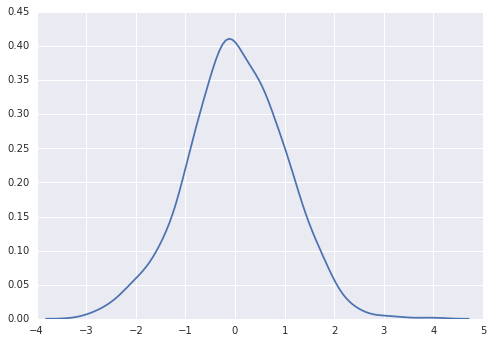

In [86]:
sns.kdeplot(stats.norm.rvs(0,size=1000))

Here we have p value greater than 0.05, which means we cannot reject the null hypothesis (There is no significant difference between the Cumulative Distribution Function of standard normal distribution and our distribution).

In [90]:
np.random.seed(1)
stats.kstest(stats.expon.rvs(size=100),'norm')

KstestResult(statistic=0.50004563155995296, pvalue=0.0)

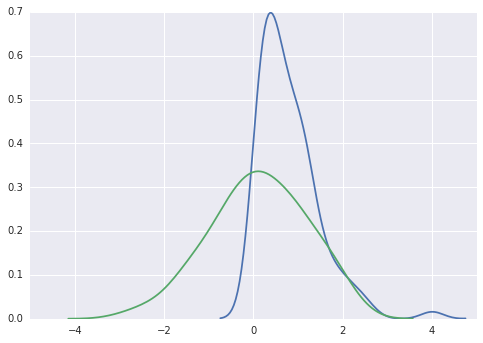

In [89]:
sns.kdeplot(stats.expon.rvs(size=100))
sns.kdeplot(stats.norm.rvs(0,size=100))

Here we have p value less than 0.05, therefore we reject the null hypothesis (the CDF for given distribution has great significant difference with the CDF of normal distribution).(the actual distribution is a exponential distribution.)

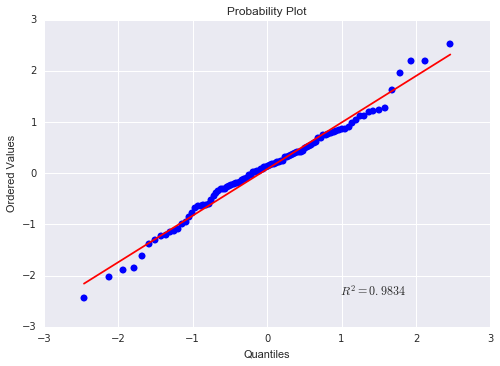

In [91]:
x = stats.norm.rvs(size=100)
res = stats.probplot(x, plot=plt)

From the above normal QQ plot, we can see the points are very close to the straight line.

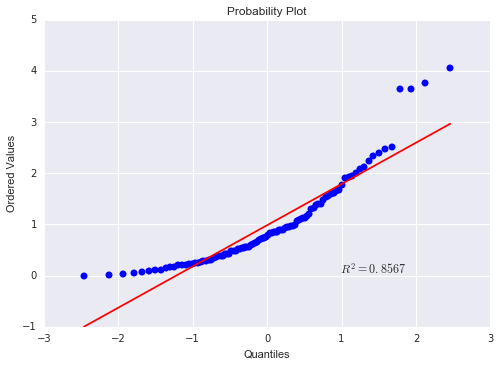

In [92]:
x = stats.expon.rvs(size=100)
res = stats.probplot(x, plot=plt)

But if the distribution is exponential, the points are not close to the straight line. So that we can confirm that the variable does not follow normal distribution.

# Feature Selection Method

1.Univariate Selection: Such as SelectKBest class in sklearn which is used with a set of statistical tests to select a specific number of features, such as using the Chi-square test for non-negative features.

2.Recursive Feature Elimination: remove a attribute and build a model on the remaining attributes, use the model accuracy to identify which attribute contributes the most to the target attribute.

3.Principle Component Analysis, which is a widely used dimension reduction method to transform the data into a compact form. 

4.If using random forest method, you can import ExtraTreeClassifier in sklearn, which will give a score of importance for each feature in the dataset.  